# Multi armed Bandits


In [174]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy as sc
from typing import List

class Arms:
    '''Class representing a multi-armed bandit problem'''
    def __init__(self, n_arms: int, mu: List[float], vals: float)::
        self.true_val = mu              # Array of true means (reward probabilities)
        self.N = np.zeros(n_arms)       # Count of times each arm is pulled
        self.val = vals*np.ones(n_arms) # Estimated average reward (initialized to None)
        self.next_action = None

    def pull_arm(self) -> int:
        '''Pull an arm of the bandit and return the reward'''
        arm = self.next_action
        reward = np.random.binomial(1,self.true_val[arm])
        self.N[arm] += 1
        self.val[arm] +=  (reward - self.val[arm])/self.N[arm] # Update estimated average reward with sample mean
        return reward
    
    def greedy(self):
        '''Select the next action greedily based on estimated average rewards'''
        ties = np.flatnonzero(self.val == np.max(self.val))
        max_arm = np.random.choice(ties) # Break ties randomly
        self.next_action = max_arm
        
    def epsilon_greedy(self):
        '''Select the next action based on epsilon-greedy strategy'''
        if np.random.random() < self.epsilon:
            self.next_action = np.random.randint(len(self.N))
        else:
            self.greedy()
        
        
    def UCB():
        
    

def ploting(rewards,titles,best):
    plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
    
    # Plot the best performance as a dashed line
    plt.plot([best for _ in range(len(rewards[0]))], linestyle="--")
    
    # Plot the rewards for each agent
    for i in range(len(titles)):
        plt.plot(rewards[i], label = titles[i])   
    plt.legend()
    plt.grid(True, which='both')
    
    plt.title("Average Reward Agent")
    plt.xlabel("Steps")
    plt.ylabel("Average reward")
    
    # Set axis limits to start from 0
    plt.xlim(0, len(rewards[0]))
    plt.ylim(0, max(best, 1))
    
    plt.show()
    

In [175]:
def GreedyAgent(n_runs,n_steps,n_arms,true_values):
    greedy_reward    = np.zeros((n_runs, n_steps))
    greedy_reward_HI = np.zeros((n_runs, n_steps))
    
    for run in range(n_runs):
        greedy_arms    = Arms(n_arms,true_values,0.1)
        greedy_arms_HI = Arms(n_arms,true_values,0.2)
        for i in range(num_steps):
            greedy_arms.greedy()
            greedy_reward[run,i] = greedy_arms.pull_arm()
            greedy_arms_HI.greedy()
            greedy_reward_HI[run,i] = greedy_arms_HI.pull_arm()
        
    greedy_reward = np.mean(greedy_reward, axis=0)
    greedy_reward_HI = np.mean(greedy_reward_HI, axis=0)

    ploting([greedy_reward,greedy_reward_HI],['Greedy','Greedy HI'],np.max(true_values))
    return 1
    

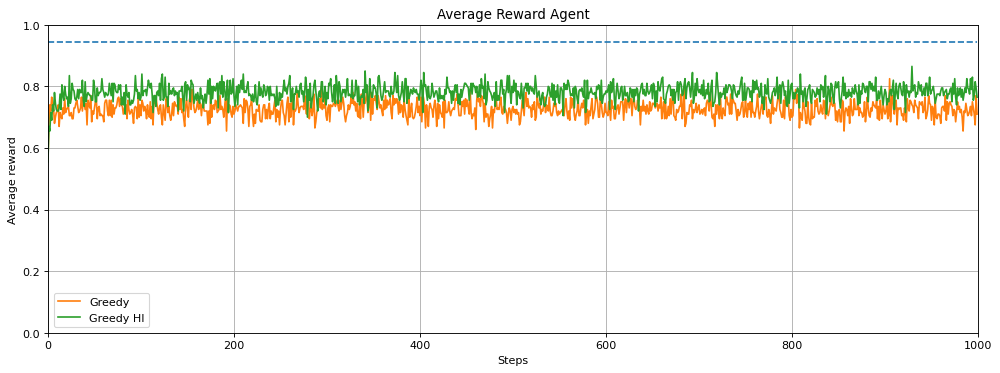

1

In [176]:
# define arms

n_runs  = 200   # The number of times we run the experiment
n_steps = 1000  # The number of pulls of each arm the agent takes
n_arms  = 10
true_values = np.random.rand(n_arms)

GreedyAgent(n_runs,n_steps,n_arms,true_values)

In [119]:
true_values

array([0.54385957, 0.20458198, 0.0077408 , 0.79638372, 0.17648926,
       0.95038311, 0.95243559, 0.17428689, 0.85160846, 0.78518854])